In [15]:
%matplotlib notebook 

import numpy
import matplotlib.pyplot as plot

In [16]:
import matplotlib
matplotlib.rc('text', usetex=True)

In [17]:
numpy.random.seed(1234)

In [18]:
def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

In [19]:
from sklearn.datasets import make_blobs
n_dim = 2
x_tra, y_tra = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)
x_tes, y_tes = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

y_tra = label_map(y_tra, [0, 1], 0)
y_tra = label_map(y_tra, [2, 3], 1)
y_tes = label_map(y_tes, [0, 1], 0)
y_tes = label_map(y_tes, [2, 3], 1)

In [20]:
def perceptron(x, w, pre=False):
    def sign(y):
        return numpy.maximum(0., numpy.sign(y))
    
    x = x.reshape([1, -1]) if len(x.shape) < 2 else x
    
    y = numpy.sum(x * w[None,:-1], axis=1) + w[-1]
    if pre:
        return y    
    return sign(y)

In [21]:
def perceptron_dist(y, x, w, avg=False):
    y_ = perceptron(x, w)
    d = -(y - y_) * perceptron(x, w, pre=True)
    if not avg:
        return d
    return numpy.mean(d)

In [22]:
def perceptron_rule(y, x, w):
    y_ = perceptron(x, w)
    dw = numpy.zeros(w.shape)
    dw[:-1] = numpy.mean((y_tra - y_)[:, None] * x, axis=0)
    dw[-1] = numpy.mean(y_tra - pred_y)
    return dw

In [23]:
w0 = numpy.random.randn(n_dim+1); w0[-1] = 0.
w = numpy.copy(w0)

tra_er = numpy.sum(numpy.abs(perceptron(x_tra, w) - y_tra)) / numpy.float(len(y_tra))
tes_er = numpy.sum(numpy.abs(perceptron(x_tes, w) - y_tes)) / numpy.float(len(y_tes))

print ('Training error rate {}, Test error rate {}'.format(tra_er, tes_er))

n_iter = 1000
eta = .1
old_cost = numpy.Inf
for ni in range(n_iter):
    pred_y = perceptron(x_tra, w)
    w += eta * perceptron_rule(y_tra, x_tra, w)
    cost = perceptron_dist(y_tra, x_tra, w, avg=True)
    if numpy.mod(ni, 1) == 0:
        print ('Perceptron cost {:.4f} after iteration {}'.format(cost, ni))
    if cost < 1e-16 or cost / old_cost >= 1.:
        print ('Converged')
        break
    old_cost = cost

Training error rate 0.5, Test error rate 0.51
Perceptron cost 0.4857 after iteration 0
Perceptron cost 0.4646 after iteration 1
Perceptron cost 0.4440 after iteration 2
Perceptron cost 0.4242 after iteration 3
Perceptron cost 0.4049 after iteration 4
Perceptron cost 0.3856 after iteration 5
Perceptron cost 0.3672 after iteration 6
Perceptron cost 0.3491 after iteration 7
Perceptron cost 0.3311 after iteration 8
Perceptron cost 0.3134 after iteration 9
Perceptron cost 0.2957 after iteration 10
Perceptron cost 0.2780 after iteration 11
Perceptron cost 0.2605 after iteration 12
Perceptron cost 0.2431 after iteration 13
Perceptron cost 0.2259 after iteration 14
Perceptron cost 0.2086 after iteration 15
Perceptron cost 0.1913 after iteration 16
Perceptron cost 0.1741 after iteration 17
Perceptron cost 0.1569 after iteration 18
Perceptron cost 0.1397 after iteration 19
Perceptron cost 0.1224 after iteration 20
Perceptron cost 0.1052 after iteration 21
Perceptron cost 0.0880 after iteration 2

In [24]:
# visualize data 
def vis_data(x, y, c='r'):
    for x_, y_ in zip(x, y):
        plot.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')
    plot.grid('on')

In [25]:
def vis_hyperplane(w, typ='k--'):

    lim0 = plot.gca().get_xlim()
    lim1 = plot.gca().get_ylim()
    m0, m1 = lim0[0], lim0[1]

    intercept0 = -(w[0] * m0 + w[-1])/w[1]
    intercept1 = -(w[0] * m1 + w[-1])/w[1]
    
    plt1, = plot.plot([m0, m1], [intercept0, intercept1], typ)

    plot.gca().set_xlim(lim0)
    plot.gca().set_ylim(lim1)
    
    return plt1

<IPython.core.display.Javascript object>


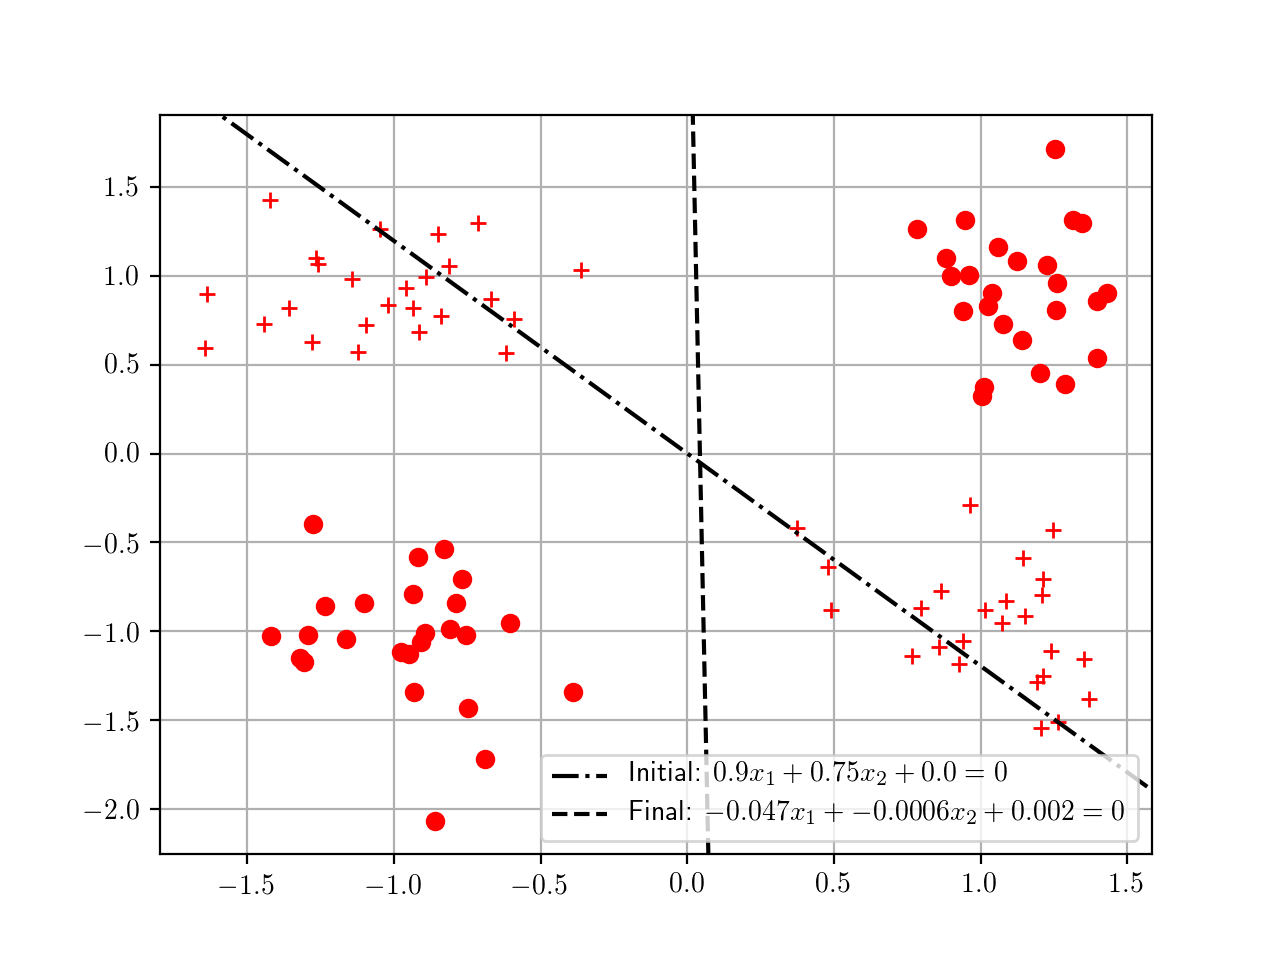

In [26]:
plot.figure()

vis_data(x_tra, y_tra, c='r')
#vis_data(x_tes, y_tes, c='b')

plt0 = vis_hyperplane(w0, 'k-.')
plt1 = vis_hyperplane(w, 'k--')
plot.legend([plt0, plt1], [
        'Initial: ${:.2} x_1 + {:.2} x_2 + {:.2} = 0$'.format(*list(w0)),
        'Final: ${:.2} x_1 + {:.2} x_2 + {:.2} = 0$'.format(*list(w))],
           loc='best')

plot.show()

In [13]:
plot.savefig('../figures/perceptron_failure.pdf', dpi=100)

In [27]:
tra_er = numpy.sum(numpy.abs(perceptron(x_tra, w) - y_tra)) / numpy.float(len(y_tra))
tes_er = numpy.sum(numpy.abs(perceptron(x_tes, w) - y_tes)) / numpy.float(len(y_tes))

print ('Training error rate {}, Test error rate {}'.format(tra_er, tes_er))

Training error rate 0.5, Test error rate 0.5
